In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('./Health_dataset/dataset.csv')
df = shuffle(df, random_state=42)

In [3]:
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')

In [4]:
print(df.describe())

       Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  Symptom_5  \
count     4920       4920       4920      4920         4572       3714   
unique      41         34         48        54           50         38   
top       Acne   vomiting   vomiting   fatigue   high fever   headache   
freq       120        822        870       726          378        348   

       Symptom_6        Symptom_7        Symptom_8           Symptom_9  \
count       2934             2268             1944                1692   
unique        32               26               21                  22   
top       nausea   abdominal pain   abdominal pain   yellowing of eyes   
freq         390              264              276                 228   

                Symptom_10     Symptom_11 Symptom_12         Symptom_13  \
count                 1512           1194        744                504   
unique                  21             18         11                  8   
top      yellowing of eyes   irri

In [5]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print("Null values before cleaning:")
print(null_checker)

Null values before cleaning:
            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


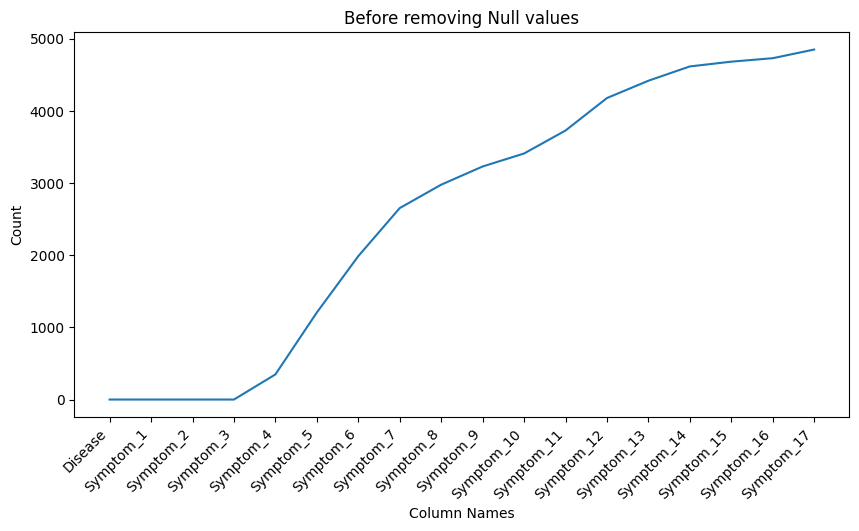

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Before removing Null values')
plt.xlabel('Column Names')
plt.ylabel('Count')
plt.show()


In [7]:
cols = df.columns
data = df[cols].values.flatten()
s = pd.Series(data).str.strip().values.reshape(df.shape)
df = pd.DataFrame(s, columns=df.columns)

In [8]:
df = df.fillna(0)

In [9]:
df1 = pd.read_csv('./Health_dataset/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_', ' ')

In [10]:
vals = df.values
symptoms = df1['Symptom'].unique()

In [11]:

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

In [12]:
df = pd.DataFrame(vals, columns=cols)


In [13]:
df = df.replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], 0)


C:\Users\Smart\AppData\Local\Temp\ipykernel_14548\1738949238.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['dischromic  patches', 'spotting  urination', 'foul smell of urine'], 0)


In [14]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print("Null values after cleaning:")
print(null_checker)

Null values after cleaning:
            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


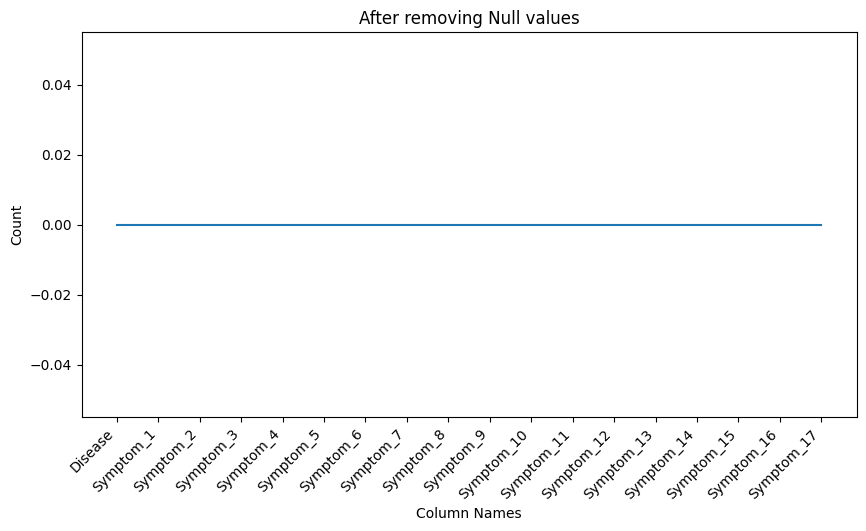

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(rotation=45, ha='right')
plt.title('After removing Null values')
plt.xlabel('Column Names')
plt.ylabel('Count')
plt.show()

In [16]:
print("Unique symptoms used:", len(df1['Symptom'].unique()))
print("Unique diseases identified:", len(df['Disease'].unique()))

Unique symptoms used: 132
Unique diseases identified: 41


In [17]:
data = df.iloc[:, 1:].values
labels = df['Disease'].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)


In [19]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, max_depth=13)
rnd_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=500, random_state=42)

In [20]:
preds = rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=np.unique(labels), columns=np.unique(labels))

In [21]:
print('F1-score% =', f1_score(y_test, preds, average='macro')*100)
print('Accuracy% =', accuracy_score(y_test, preds)*100)


F1-score% = 99.58380389536958
Accuracy% = 99.59349593495935


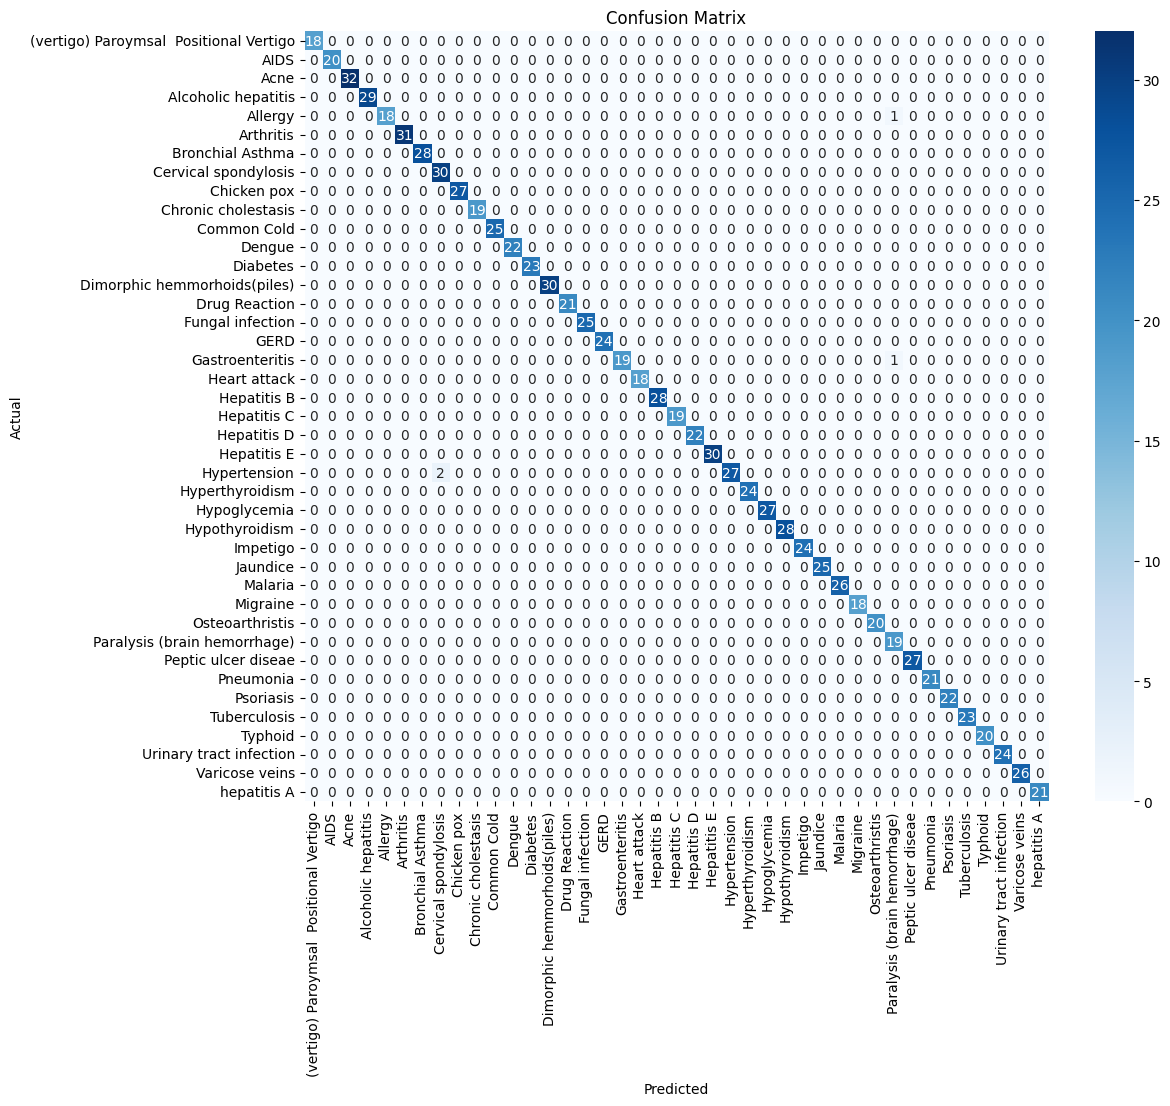

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, preds))

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       1.00      0.95      0.97        19
                              Arthritis       1.00      1.00      1.00        31
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       0.94      1.00      0.97        30
                            Chicken pox       1.00      1.00      1.00        27
                    Chronic cholestasis       1.00      1.00      1.00        19
                            Common Cold       1.00      1.00      1.00        25
    

In [24]:
# Cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
rnd_forest_train = cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-Validation Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean() * 100.0, rnd_forest_train.std() * 100.0))

Cross-Validation Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [25]:
rnd_forest_test = cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
print("Test Set Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean() * 100.0, rnd_forest_test.std() * 100.0))

Test Set Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


In [26]:
joblib.dump(rnd_forest, './Health_Disease_RandomForestModel.joblib')

['./Health_Disease_RandomForestModel.joblib']

In [27]:
loaded_rf = joblib.load('./Health_Disease_RandomForestModel.joblib')


In [28]:
discrp = pd.read_csv("./Health_dataset/symptom_Description.csv")
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [29]:
prec = pd.read_csv("./Health_dataset/symptom_precaution.csv")
prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [30]:
# Function to predict disease based on symptoms
def predd(x, S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15, S16, S17):
    psymptoms = [S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15, S16, S17]
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j] == a[k]:
                psymptoms[j] = b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    
    # Print disease description and precautions
    disp = discrp[discrp['Disease'] == pred2[0]].values[0][1]
    recomnd = prec[prec['Disease'] == pred2[0]]
    c = np.where(prec['Disease'] == pred2[0])[0][0]
    precaution_list = []
    for i in range(1, len(prec.iloc[c])):
        precaution_list.append(prec.iloc[c, i])
        
    print("The Disease Name: ", pred2[0])
    print("The Disease Description: ", disp)
    print("Recommended Precautions: ")
    for i in precaution_list:
        print(i)

In [31]:
n_groups = 2
algorithms = ('Random Forest')
train_accuracy = (rnd_forest_train.mean()*100.0)
test_accuracy = (rnd_forest_test.mean()*100.0)
Standard_Deviation=(rnd_forest_test.std()*100.0)

In [32]:
# Example prediction
sympList = df1["Symptom"].to_list()
predd(rnd_forest, sympList[56], sympList[66], sympList[15], sympList[4], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0)

The Disease Name:  Impetigo
The Disease Description:  Impetigo (im-puh-TIE-go) is a common and highly contagious skin infection that mainly affects infants and children. Impetigo usually appears as red sores on the face, especially around a child's nose and mouth, and on hands and feet. The sores burst and develop honey-colored crusts.
Recommended Precautions: 
soak affected area in warm water
use antibiotics
remove scabs with wet compressed cloth
consult doctor


In [33]:
import pickle


filename = 'modellw.pkl'


with open(filename, 'wb') as file:
    pickle.dump(rnd_forest, file)
